In [15]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.cosmology import Planck15
cosmo = Planck15
H0 =  cosmo.H0.to('1/s').value

In [12]:
def LISA_noise_AET(f, channel, foreground=False):
    L = 2.5*1e9 #m
    c = 3*1e8 #m/s
    P = 15
    A = 3
    pm = 1e-12 #m
    fm = 1e-15 #m
    
    
    def Poms(f):
        return P*P * pm*pm * ( 1 + (2*1e-3/f)**4 )* (2*np.pi * f /c)**2

    def Pacc(f):
        return A*A * fm*fm * ( 1 + (0.4*1e-3/f)**2 ) * (1 + (f/(8*1e-3))**4 ) * (1/(2* np.pi*f))**4 * (2* np.pi* f /c)**2

    def N_AA(f):
        arg = 2*np.pi*f*L/c
        return 8* np.sin(arg)**2 * (4* (1+ np.cos(arg) + np.cos(arg**2))*Pacc(f) + (2+ np.cos(arg))*Poms(f) )
    
    def N_TT(f):
        arg = 2*np.pi*f*L/c
        return 16* np.sin(arg)**2 * (2*(1- np.cos(arg))**2 * Pacc(f) + (1-np.cos(arg))* Poms(f) )
    
    def R_AA(f):
        arg = 2*np.pi*f*L/c
        return 16* np.sin(arg)**2 * arg**2 * (9/20 /(1 + 0.7*arg**2))
    
    def R_TT(f):
        arg = 2*np.pi*f*L/c
        return 16* np.sin(arg)**2 * arg**2 * (9* arg**6/20 /(1.8e3  + 0.7*arg**8))
    
    if channel == 'A' or channel== 'E':
        return N_AA(f)/R_AA(f)
    elif channel == 'T':
        return N_TT(f)/R_TT(f)
    else:
        print('Channel not found')
        return 0
    
 



In [10]:
f = np.logspace(-5, 0, 1000)

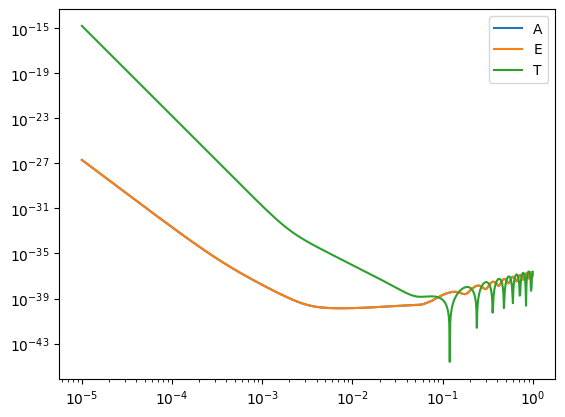

In [14]:
psd_A = LISA_noise_AET(f, 'A')
psd_E = LISA_noise_AET(f, 'E')
psd_T = LISA_noise_AET(f, 'T')

plt.loglog(f, psd_A, label='A')
plt.loglog(f, psd_E, label='E')
plt.loglog(f, psd_T, label='T')
plt.legend()
plt.show()


In [16]:
def Omega_noise(f, psd):
    return 4*np.pi**2 * f**3 * psd/(3*(H0/0.7)**2 )

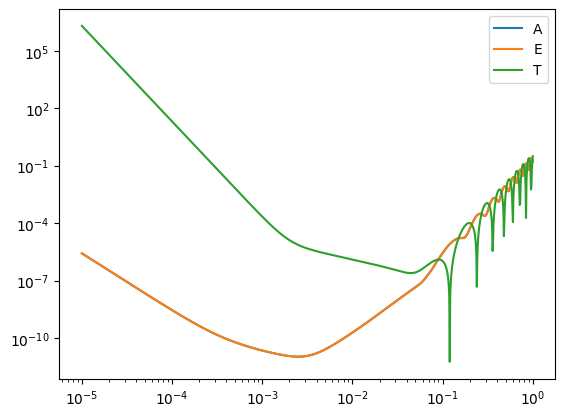

In [18]:
Omega_A = Omega_noise(f, psd_A) 
Omega_E = Omega_noise(f, psd_E)
Omega_T = Omega_noise(f, psd_T)

plt.loglog(f, Omega_A, label='A')
plt.loglog(f, Omega_E, label='E')
plt.loglog(f, Omega_T, label='T')
plt.legend()
